# Term Paper - ERD for SQL

## PlantUML

I will load Ttareungi data from Seoul and save it in NoSQL format. PlantUML is for that.

나는 이용자를 초점으로 접근하는 것이 아닌 사람들이 이용하는 대여소를 중심으로 DataBase를 만들도록 하겠다.

Then, read the file grades.csv and display it in columns with the column heads 'ID', 'Name' and 'Grade'.

In [2]:
!pip install plantuml
import iplantuml

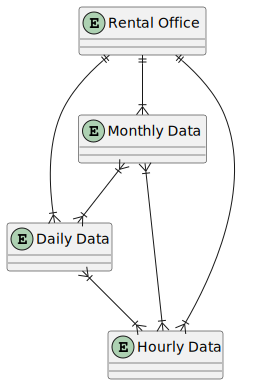

In [25]:
%%plantuml

@startuml

entity "Rental Office" as RentalOffice {
}

entity "Monthly Data" as Monthly {
}

entity "Daily Data" as Daily {
}

entity "Hourly Data" as Hourly {
}

Monthly }|--|{ Daily
Monthly }|--|{ Hourly
Daily }|--|{ Hourly

RentalOffice ||--|{ Monthly
RentalOffice ||--|{ Daily
RentalOffice ||--|{ Hourly

@enduml

## JSON schema description for NoSQL

SQL형식의 데이터를 NoSQL 형식으로 표현하기 위해서는 각 인덱스와 properties를 정의해줘야 한다. 따라서 이렇게 하도록 하겠다.

|Key|Document|
|---|---|
|Rental Office|내용 1|
|Monthly Data|내용 2|
|Daily Data|내용 3|
|Hourly Data|내용 4|

<!-- your answer here -->
Answer: <br>


In [19]:
# Your answer here

import io
import pandas as pd

grades_io = io.StringIO(
    """
    1| Red| A
    2| Green| B
    3| White| A
    """
)

grades_csv = pd.read_csv(
    grades_io,
    sep="|",
    skipinitialspace=True
)

grades_csv.to_csv('grades.csv')
grades_csv

,ID,Name,Grade
0,1,Red,A
1,2,Green,B
2,3,White,A


In [21]:
grades_result = pd.read_csv(
    'grades.csv',
    columns=['ID', 'Name', 'Grade']
)
grades_result

,ID,Name,Grade
0,1,Red,A
1,2,Green,B
2,3,White,A



## Querying Relational Data in Python

Problem 2. Create a cars table and insert the following rows into it.

| ID  | Name         | Price  |
| --- | ------------ | ------ |
| 1   | 'Audi'       | 52642  |
| 2   | 'Mercedes'   | 57127  |
| 3   | 'Skoda'      | 9000   |
| 4   | 'Volvo'      | 29000  |
| 5   | 'Bentley'    | 350000 |
| 6   | 'Hummer'     | 41400  |
| 7   | 'Volkswagen' | 21600  |

<!-- your answer here -->
Answer: <br>


In [9]:
# Your answer here

import io
import pandas as pd

cars_table = pd.DataFrame(
    columns=['ID', 'Name', 'Price']
)

cars_table

,ID,Name,Price


In [20]:
row = {'ID':[1,2,3,4,5,6,7], 
       'Name':['Audi', 'Mercedes', 'Skoda', 'Volvo', 'Bentley', 'Hummer', 'Volkswagen'],
       'Price':[52642, 57127, 9000, 29000, 350000, 41400, 21600]}
row_df = pd.DataFrame(row)

cars_table_updated = pd.concat([cars_table, row_df], ignore_index = True)
cars_table_updated.reset_index()
cars_table_updated

,ID,Name,Price
0,1,Audi,52642
1,2,Mercedes,57127
2,3,Skoda,9000
3,4,Volvo,29000
4,5,Bentley,350000
5,6,Hummer,41400
6,7,Volkswagen,21600


## Reading and Writing JSON Files in Python

Problem 3. Create a JSON file named grades.json and write into it the following dictionary:

```json
grades_dict = {'gradebook':
  [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
    {'student_id': 2, 'name': 'Green', 'grade': 'B'},
    {'student_id': 3, 'name': 'White', 'grade': 'A'}]}
```

Then, read the file and display its pretty-printed JSON.


<!-- your answer here -->
Answer: <br>


In [24]:
# Your answer here

import io
import pandas as pd
import json

grades_dict = {'gradebook': 
    [
    {'student_id': 1, 'name': 'Red', 'grade': 'A'},
    {'student_id': 2, 'name': 'Green', 'grade': 'B'},
    {'student_id': 3, 'name': 'White', 'grade': 'A'}
    ]
    }

grades_df = pd.DataFrame(grades_dict)
grades_df.to_json('grades.json', orient="table")

In [52]:
grades_df

,gradebook
0,"{'student_id': 1, 'name': 'Red', 'grade': 'A'}"
1,"{'student_id': 2, 'name': 'Green', 'grade': 'B'}"
2,"{'student_id': 3, 'name': 'White', 'grade': 'A'}"


In [25]:
# Reading a JSON file
grades_JSON = pd.read_json('grades.json', orient = 'table')
grades_JSON

,gradebook
0,"{'student_id': 1, 'name': 'Red', 'grade': 'A'}"
1,"{'student_id': 2, 'name': 'Green', 'grade': 'B'}"
2,"{'student_id': 3, 'name': 'White', 'grade': 'A'}"


In [26]:
from pprint import pprint
pprint(grades_JSON)

                                          gradebook
0    {'student_id': 1, 'name': 'Red', 'grade': 'A'}
1  {'student_id': 2, 'name': 'Green', 'grade': 'B'}
2  {'student_id': 3, 'name': 'White', 'grade': 'A'}


## Accessing Elasticsearch data in Python

Problem 4. Index a following document and search the document whose title is "Python."

```json
{
  'author': 'John Doe',
  'blog': 'Learning Elasticsearch',
  'title': 'Using Python with Elasticsearch',
  'tags': ['python', 'elasticsearch', 'tips'],
}
```

<!-- your answer here -->
Answer: <br>


In [81]:
# Your answer here

! pip install elasticsearch

In [2]:
from datetime import datetime
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200")

doc = {
    'author': 'John Doe',
    'blog': 'Learning Elasticsearch',
    'title': 'Using Python with Elasticsearch',
    'tags': ['python', 'elasticsearch', 'tips'],
}

resp = es.index(index="test-index", id=1, document=doc)
print(resp["result"])

------

updated
{'author': 'John Doe', 'blog': 'Learning Elasticsearch', 'title': 'Using Python with Elasticsearch', 'tags': ['python', 'elasticsearch', 'tips']}


C:\Users\kmch1\AppData\Local\Temp/ipykernel_51376/3382341001.py:13: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  resp = es.index(index="test-index", id=1, document=doc)
C:\Users\kmch1\AppData\Local\Temp/ipykernel_51376/3382341001.py:19: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  resp = es.get(index="test-index", id=1)


In [14]:
result = es.search(index="test-index", query={
    'match': {
        'title': 'Python',
    }
})

C:\Users\kmch1\AppData\Local\Temp/ipykernel_51376/2982782452.py:1: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.15/security-minimal-setup.html to enable security.
  result = es.search(index="test-index", query={


In [16]:
print(result)

{'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 1, 'relation': 'eq'}, 'max_score': 0.2876821, 'hits': [{'_index': 'test-index', '_type': '_doc', '_id': '1', '_score': 0.2876821, '_source': {'author': 'John Doe', 'blog': 'Learning Elasticsearch', 'title': 'Using Python with Elasticsearch', 'tags': ['python', 'elasticsearch', 'tips']}}]}}


In [17]:
print("Got %d Hits:" % result['hits']['total']['value'])

Got 1 Hits:
